# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./D00_lena.png')

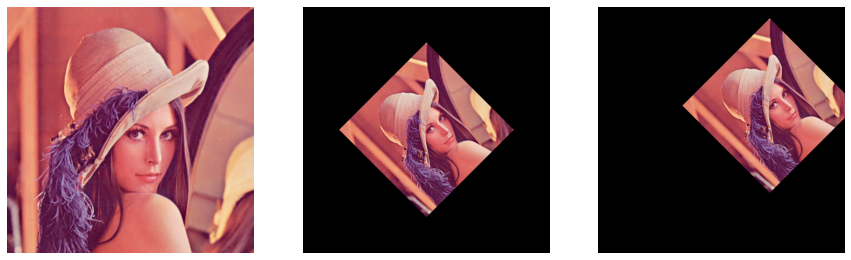

In [2]:
# 取得旋轉矩陣
# getRotationMatrix2D(center, angle, scale)
M_rotate = cv2.getRotationMatrix2D(([i//2 for i in img.shape[-2::-1]]), 45, 0.5)

# 取得平移矩陣
M_translate = np.float32([[1, 0, 100], [0, 1, -50]])

# 旋轉
img_rotate = cv2.warpAffine(img, M_rotate, (img.shape[-2::-1]))

# 平移
img_rotate_trans = cv2.warpAffine(img_rotate, M_translate, (img.shape[-2::-1]))

# 組合 + 顯示圖片
plt.figure(figsize=(15,5))
for i, x in enumerate([img,img_rotate,img_rotate_trans]):
    plt.subplot(1, 3, i+1).imshow(x[...,[2, 1, 0]])
    plt.axis('off')
plt.show()

## Affine Transformation - Case 2: any three point
直接建構仿射矩陣 (圖片至少包含 3 個點以上的 pair)

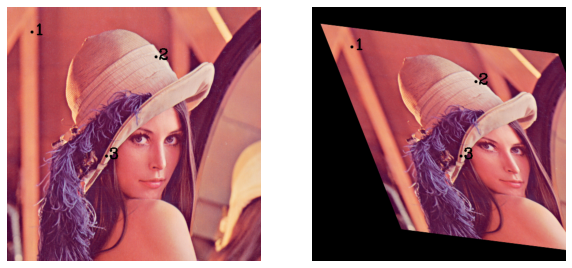

In [3]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
pt1 = np.float32([[50,50], [300,100], [200,300]])
pt2 = np.float32([[80,80], [330,150], [300,300]])

# 取得 affine 矩陣並做 affine 操作
M_affine = cv2.getAffineTransform(pt1, pt2)
img_affine = cv2.warpAffine(img, M_affine, (img.shape[-2::-1]))

# 在圖片上標記點 + 顯示圖片
img_original = img.copy()

plt.figure(figsize=(10,5))
for i, pair in enumerate(zip([pt1, pt2], [img_original, img_affine])):
    for idx, pts in enumerate(pair[0]):
        pts = tuple(map(int, pts))
        cv2.circle(pair[1], pts, 3, (0, 0, 0), -1)
        cv2.putText(pair[1], str(idx+1), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.subplot(1, 2, i+1).imshow(pair[1][...,[2, 1, 0]])
    plt.axis('off')
plt.show()